In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

- Reading data from csv file

<h3>Objective:</h3><b>To indentify the countries which are in direst need of help from NGO</b>

In [3]:
countries=pd.read_csv('C:\\UpGrad\\PCA\\Country-data.csv')

In [4]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- **We need to indentify the outliers before performing PCA as it will be affecting the final modal.**
- **Since we are trying to find the countries which need help,such countries will have features of higher child mort rate,low income per person,low life expectancy,higher fertility rate and lower GDP.**
- **Countries with higher GDP and higher income per person above threshold value can never be the once in direst need of help.**
- **So we remove the outliers on the positive side of the curve.If we remove from the lower end we'll lose the countries with need.**
- **So we consider 2 factors to remove outliers <code>higher GDP and higher income per person above threshold value</code>**

In [5]:
countries.describe(percentiles=[0.25,0.5,0.75,0.97,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
97%,130.140000,87.038000,11.802000,92.768000,62496.000000,23.626000,81.902000,6.230600,52218.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
countries.drop_duplicates(inplace=True)

In [8]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [9]:
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- From the above outputs we can see that their are 167 entries and none of the rows are duplicate or have null values.

- **We use the formula <code>Q3+1.5(IQR)</code> to remove outliers on the higher side.**

In [10]:
countries[['gdpp']].quantile(0.75)+1.5*(countries[['gdpp']].quantile(0.75)-countries[['gdpp']].quantile(0.25))

gdpp    33130.0
dtype: float64

In [11]:
countries[['income']].quantile(0.75)+1.5*(countries[['income']].quantile(0.75)-countries[['income']].quantile(0.25))

income    51967.5
dtype: float64

- We take out the countries which are having higher income and gpp above the threshould value.

In [12]:
countries=countries[~((countries['income']>51967.5)&(countries['gdpp']>33130))]

In [13]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 166
Data columns (total 10 columns):
country       159 non-null object
child_mort    159 non-null float64
exports       159 non-null float64
health        159 non-null float64
imports       159 non-null float64
income        159 non-null int64
inflation     159 non-null float64
life_expec    159 non-null float64
total_fer     159 non-null float64
gdpp          159 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.7+ KB


- After the removel we have left with 159 countries.

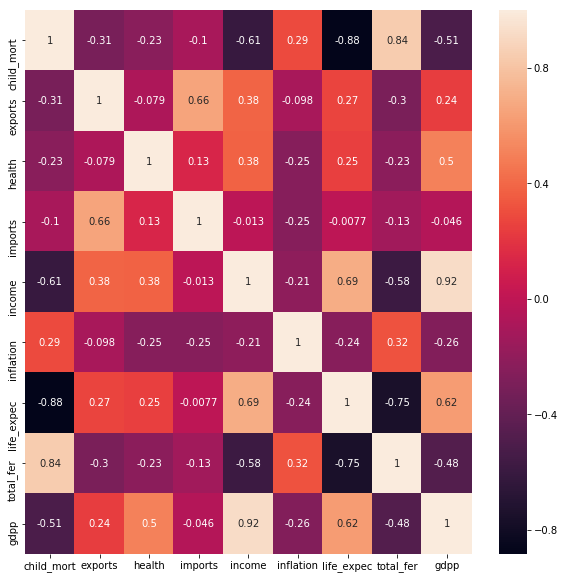

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(countries.corr(),annot=True)
plt.show()

- We use standard scaler because it normalizes the data which is required for PCA.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
std=StandardScaler()

In [17]:
stdcountry=std.fit_transform(countries.drop('country',axis=1))

- Performing PCA will help us reduce the number of features required.This will improve kmeans algorithm processing power and form clusters efficiently 

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(svd_solver='randomized',random_state=100)

- we can use the svd solver auto also since the dataset is too small but for larger dataset we should go with randomized.

In [20]:
pca.fit(stdcountry)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[ 4.23087991e-01, -2.11868918e-01, -2.16641868e-01,
        -8.90975540e-02, -4.22562925e-01,  2.00245027e-01,
        -4.27047233e-01,  4.04395624e-01, -3.95819889e-01],
       [ 1.42694498e-02,  6.09835548e-01, -1.67573897e-01,
         7.11729090e-01, -1.29041711e-01, -1.44402817e-01,
        -1.14335756e-01, -1.41988437e-02, -2.06105482e-01],
       [-2.75894057e-01,  1.57728448e-01, -6.90256796e-01,
        -2.29808367e-01, -2.80816560e-02,  4.49836313e-01,
         2.60897292e-01, -2.32318989e-01, -2.11085477e-01],
       [ 2.63539136e-01,  3.49705910e-01,  1.07273366e-01,
         1.53484322e-02,  3.82043421e-01,  6.35419234e-01,
        -1.16474464e-01,  3.00192542e-01,  3.78302933e-01],
       [-2.39448825e-01, -1.55533927e-01,  5.55776209e-01,
         2.59006806e-01, -2.90737777e-01,  5.58150943e-01,
         1.13247755e-01, -2.21424404e-01, -2.90838420e-01],
       [ 2.20607507e-01, -6.46733597e-05, -1.52485533e-02,
        -7.54527253e-02,  1.41190737e-01,  5.651317

In [22]:
pca.explained_variance_ratio_.round(2)

array([0.47, 0.18, 0.13, 0.1 , 0.07, 0.03, 0.02, 0.01, 0.01])

In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46851114, 0.64673924, 0.77265164, 0.87596973, 0.943533  ,
       0.96902591, 0.98534247, 0.99477885, 1.        ])

- We plot the scree plot to see how components are able to explain the amount of variance.

Text(0.5,1,'Scree PLot')

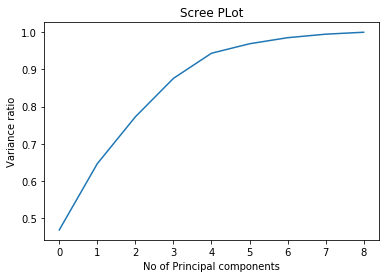

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Principal components')
plt.ylabel('Variance ratio')
plt.title('Scree PLot')

- We can see from the above graph that more that 90% of data is explained by 4 components,So we choose 4 components for futher analysis.

In [25]:
from sklearn.decomposition import IncrementalPCA

In [26]:
incp=IncrementalPCA(n_components=4)
pcatranscountry=incp.fit_transform(stdcountry)

In [27]:
pcatranscountry.shape

(159, 4)

In [28]:
pcatranscountry=np.transpose(pcatranscountry)

In [29]:
pcatranscountry.shape

(4, 159)

In [30]:

pcatranscountry=pd.DataFrame({'PC1':pcatranscountry[0],'PC2':pcatranscountry[1],'PC3':pcatranscountry[2],'PC4':pcatranscountry[3]})
pcatranscountry.shape

(159, 4)

In [31]:
pcatranscountry.head()

,PC1,PC2,PC3,PC4
0,-2.882595,-0.458669,1.306884,0.018597
1,0.532757,-0.070778,-0.559133,-1.204351
2,-0.171873,-0.399340,-1.588681,0.086447
3,-2.988698,0.940335,-0.556970,2.103364
4,1.246841,0.605556,-0.401736,-0.494462


- We plot and see how the PC1 and PC2 are able to explain the variance of data.


Text(0,0.5,'Principal component 2')

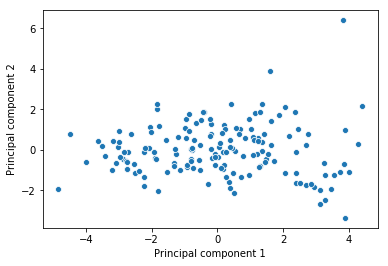

In [32]:
sns.scatterplot(x='PC1',y='PC2',data=pcatranscountry)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(pcatranscountry)

0.7472920918932611

- We can see from above output the value if above 0.5 so the data is random and we can perform clustering on the data.

- **First we do K means clustering than we perform hierarchical clustering to see the ouput difference and find the variation in countries**

In [35]:
from sklearn.cluster import KMeans

In [36]:
from sklearn.metrics import silhouette_score

- We plot elbow curve and see silhoutte score to know k value.

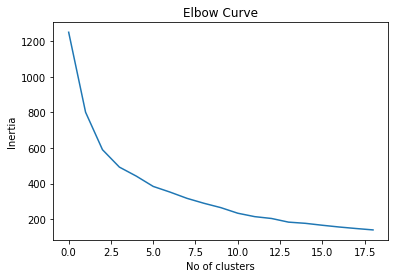

In [37]:
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcatranscountry)
    
    ssd.append(model_clus.inertia_)
plt.title('Elbow Curve')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.plot(ssd)

In [38]:
sse=[]
for num_clusters in list(range(2,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state=100)
    model_clus.fit(pcatranscountry)
    sse.append([num_clusters,silhouette_score(pcatranscountry, model_clus.labels_)])

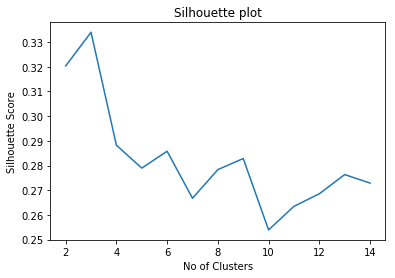

In [39]:
plt.title('Silhouette plot')
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);

- From above 2 graphs we can see that silhoutte score is max at 3 and elbove curve has almost stable values after 3
- Therefore we choose 3 clusters to be formed.

In [40]:
kmeans4=KMeans(n_clusters = 3, max_iter=50,random_state=100)

In [41]:
kmeans4.fit(pcatranscountry)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

- We concat cluster with orginal dataset inorder to do the analysis and see which cluster is worst performing in terms of countries listed under it.

In [42]:
clustdata=pd.concat([countries,pd.Series(kmeans4.labels_,index=countries.index)],1)

In [43]:
clustdata.columns=['country', 'child_mort',    'exports',     'health',    'imports',
           'income',  'inflation', 'life_expec',  'total_fer','gdpp','Cluster_no']

In [44]:
clustdata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_no
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


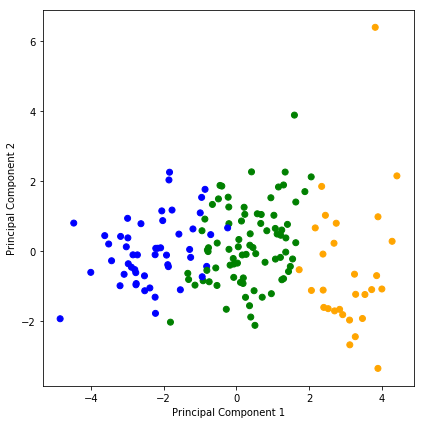

In [45]:
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(pcatranscountry['PC1'], pcatranscountry['PC2'], c = clustdata['Cluster_no'].map({0:'blue',1:'orange',2:'green'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

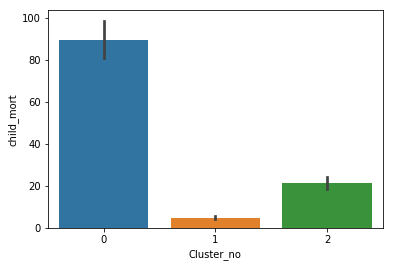

In [46]:
sns.barplot('Cluster_no','child_mort',data=clustdata)

- We can see that child mort rate is higher for cluster 0.

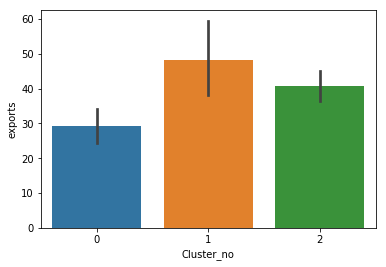

In [47]:
sns.barplot('Cluster_no','exports',data=clustdata)

- Exports are least for cluster 0.

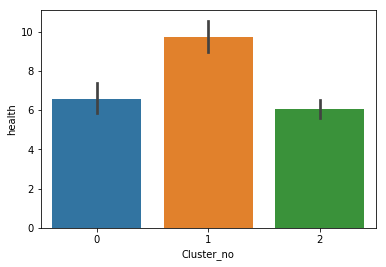

In [48]:
sns.barplot('Cluster_no','health',data=clustdata)

- Total spendings on Health out of GDP is somewhat better for cluster 0. 

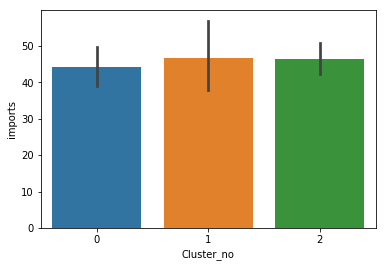

In [49]:
sns.barplot('Cluster_no','imports',data=clustdata)

- Imports are least for cluster 0.

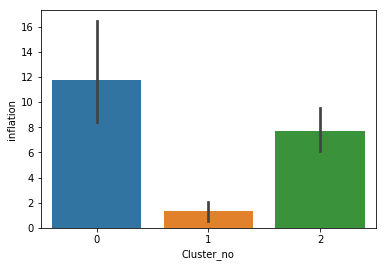

In [50]:
sns.barplot('Cluster_no','inflation',data=clustdata)

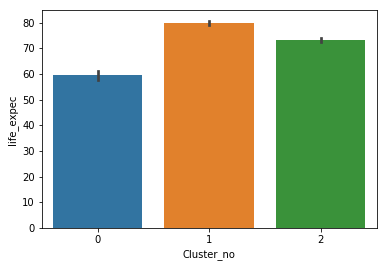

In [51]:
sns.barplot('Cluster_no','life_expec',data=clustdata)

- Life expectancy is around 60 which is vary low for cluster 0.

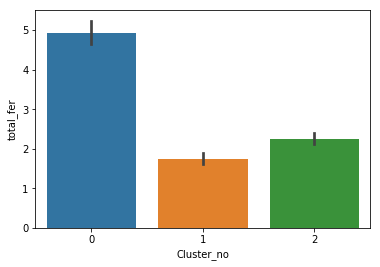

In [52]:
sns.barplot('Cluster_no','total_fer',data=clustdata)

- Fertility rate is very for cluster 0 compared to other clusters.

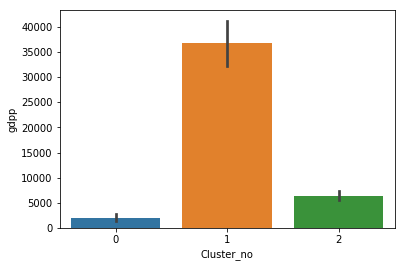

In [53]:
sns.barplot('Cluster_no','gdpp',data=clustdata)

- GDP is less than 5k for cluster 0.

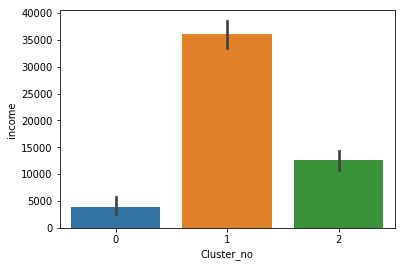

In [54]:
sns.barplot('Cluster_no','income',data=clustdata)

- Income of per person is within 5k for cluster 0.

Text(0,0.5,'Child Mort')

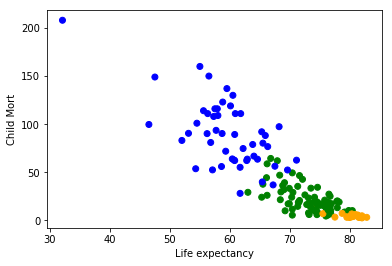

In [55]:
plt.scatter(clustdata.loc[:,'life_expec'],clustdata.loc[:,'child_mort'], c = clustdata['Cluster_no'].map({0:'blue',1:'orange',2:'green'}))
plt.xlabel('Life expectancy')
plt.ylabel('Child Mort')

- Life expectancy is within 60 and Child mort is very high for cluster 0.

Text(0,0.5,'Income')

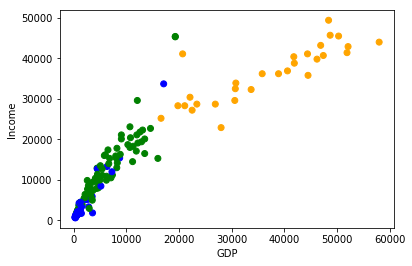

In [56]:
plt.scatter(clustdata.loc[:,'gdpp'],clustdata.loc[:,'income'], c = clustdata['Cluster_no'].map({0:'blue',1:'orange',2:'green'}))
plt.xlabel('GDP')
plt.ylabel('Income')

- **From all the above points we can clearly see that countries listed within cluster 0 are very poor and in very bad condition,These are the countries which are in need of help.**
- **Since we cannot afford to help all of them but we can choose among them which are poorly performing.**
- **GDP and Child mort are the factors we will consider to rule out the direst needed countries.**

In [57]:
inclu2=clustdata[clustdata['Cluster_no']==0]

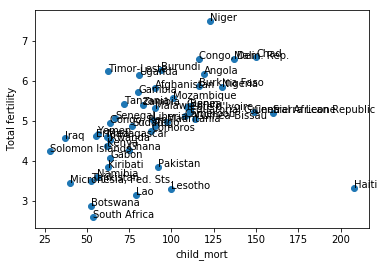

In [58]:
fig, ax = plt.subplots()
ax.scatter(inclu2['child_mort'],inclu2['total_fer'])
plt.xlabel('child_mort')
plt.ylabel('Total fertility')
for i, txt in zip(inclu2.index,inclu2['country']):
    ax.annotate(txt, (inclu2.loc[i,'child_mort'], inclu2.loc[i,'total_fer']))

In [59]:
inclu2.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_no
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.0
mean,89.794000,29.156200,6.579800,44.200000,3850.460000,11.760700,59.57000,4.931800,1904.800000,0.0
std,34.815897,17.963762,2.821201,18.931035,5481.219569,15.089722,6.47741,1.057777,2873.665291,0.0
min,28.100000,2.200000,2.200000,17.200000,609.000000,0.885000,32.10000,2.590000,231.000000,0.0
10%,53.580000,11.980000,3.743000,26.180000,915.000000,2.000000,54.18000,3.447000,411.600000,0.0
25%,62.925000,16.875000,4.585000,30.225000,1395.000000,3.940000,56.87500,4.295000,555.250000,0.0
50%,88.750000,23.800000,5.790000,42.800000,1900.000000,8.855000,60.25000,5.035000,932.000000,0.0
75%,111.000000,38.800000,8.382500,51.600000,3362.500000,16.475000,63.57500,5.527500,1475.000000,0.0
90%,130.700000,50.610000,11.120000,66.220000,8814.000000,20.960000,66.39000,6.233000,4569.000000,0.0
max,208.000000,85.800000,14.200000,101.000000,33700.000000,104.000000,71.10000,7.490000,17100.000000,0.0


- **As we discussed earlier we'll consider Child_mort and GDP to select top required countries with aid,we use cut off of 75% above of cluster 0 child mort and gdp less that 50% of the cluster 0 gdp.**

In [60]:
inclu2[(inclu2['child_mort']>111)&(inclu2['gdpp']<932)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_no
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,0
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0


- **If we compare these countries value with all other countries we can see that these are in the worst condition which needs helps.**

In [61]:
clustdata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_no
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,39.867296,38.442761,6.884088,45.830603,14107.943396,7.813491,70.089937,3.006730,10515.182390,1.188679
std,40.677112,22.043100,2.692344,21.062231,13185.988898,10.761172,8.848229,1.526494,13981.765618,0.887107
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.230000,231.000000,0.000000
25%,9.350000,23.150000,5.025000,30.750000,3300.000000,1.810000,64.300000,1.830000,1310.000000,0.000000
50%,20.700000,33.200000,6.330000,43.300000,9860.000000,5.140000,72.100000,2.520000,4500.000000,2.000000
75%,62.400000,50.500000,8.600000,58.350000,20250.000000,10.350000,76.450000,4.160000,12150.000000,2.000000
max,208.000000,153.000000,17.900000,154.000000,49400.000000,104.000000,82.800000,7.490000,58000.000000,2.000000


<h3>Performing Hierarchical clustering on the same dataset.</h3>

In [62]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [63]:
from scipy.cluster.hierarchy import cut_tree

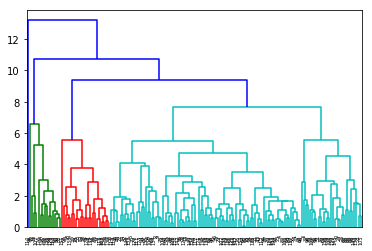

In [64]:
merges=linkage(pcatranscountry,method='complete',metric='euclidean')
dendrogram(merges)
plt.show()

- Using complete linkage as it gives clear picture

- We use the same cluster size as kmeans i,e 3.

In [65]:
cuts=pd.Series(cut_tree(merges,n_clusters=3).reshape(-1,),index=countries.index)

In [66]:
dendodata=pd.concat([countries,cuts],1)

In [67]:
dendodata.columns=['country', 'child_mort',    'exports',     'health',    'imports',
           'income',  'inflation', 'life_expec',  'total_fer','gdpp','Cluster_no']

In [68]:
dendodata.sort_values(by='Cluster_no').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_no
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630,0
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,0
104,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,0
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,0


In [69]:
dendodata[dendodata['Cluster_no']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_no
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,2


- We can see from the above outputs that it has formed seperate cluster for Nigeria which is not close to any other country and even cluster 0 has less no of contries which are closer to each other.

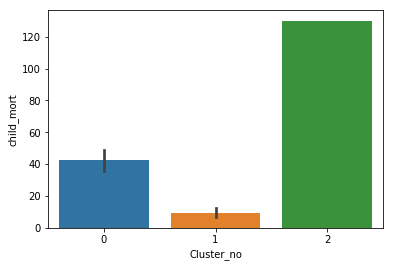

In [70]:
sns.barplot('Cluster_no','child_mort',data=dendodata)

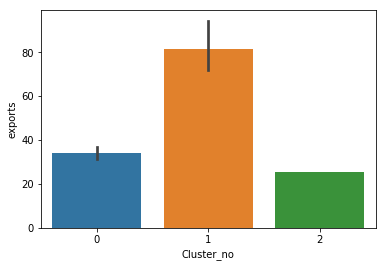

In [71]:
sns.barplot('Cluster_no','exports',data=dendodata)

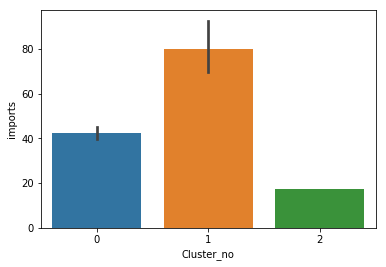

In [72]:
sns.barplot('Cluster_no','imports',data=dendodata)

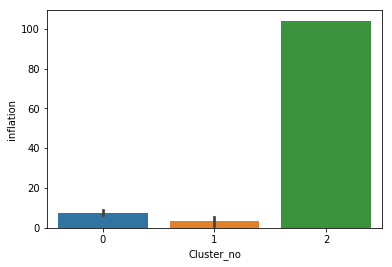

In [73]:
sns.barplot('Cluster_no','inflation',data=dendodata)

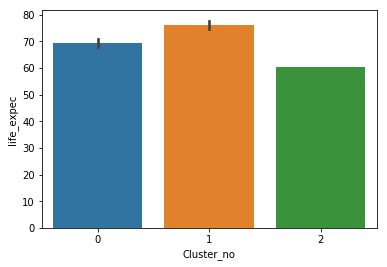

In [74]:
sns.barplot('Cluster_no','life_expec',data=dendodata)

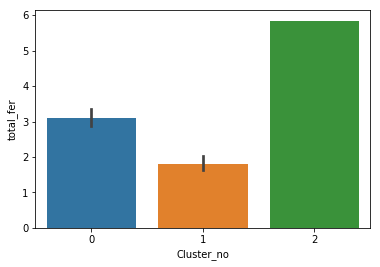

In [75]:
sns.barplot('Cluster_no','total_fer',data=dendodata)

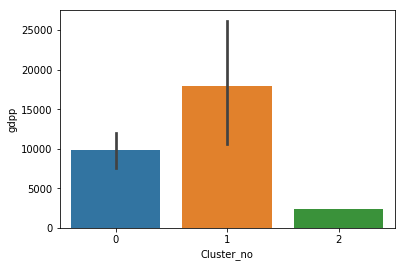

In [76]:
sns.barplot('Cluster_no','gdpp',data=dendodata)

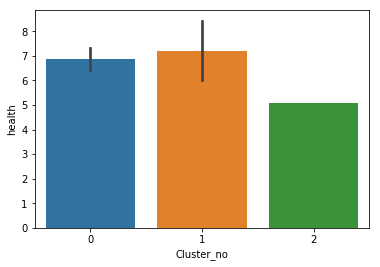

In [77]:
sns.barplot('Cluster_no','health',data=dendodata)

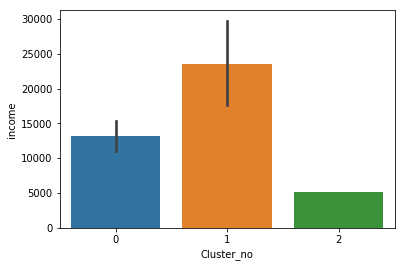

In [78]:
sns.barplot('Cluster_no','income',data=dendodata)

- We can see from all the above graphs that cluster 0 and cluster 2 are worst performing and the count of countries is less.
- If we choose these countries as the once in need that would be problem since the countries in cluster 0 and cluster 2 are far better performing than the countries what we choose in Kmeans clustering.
- This we conclude better go with kmeans chosen countries than these.

Text(0,0.5,'Total Fer')

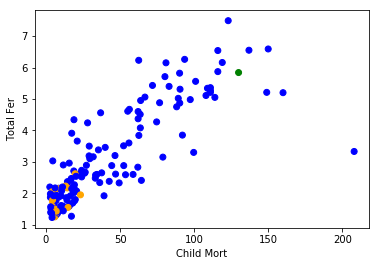

In [79]:
plt.scatter(dendodata.loc[:,'child_mort'], dendodata.loc[:,'total_fer'], c = dendodata['Cluster_no'].map({0:'blue',1:'orange',2:'green'}))
plt.xlabel('Child Mort')
plt.ylabel('Total Fer')